Processing 4.jpg


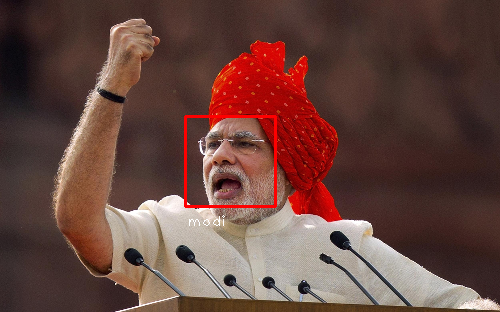

Processing 1.jpg


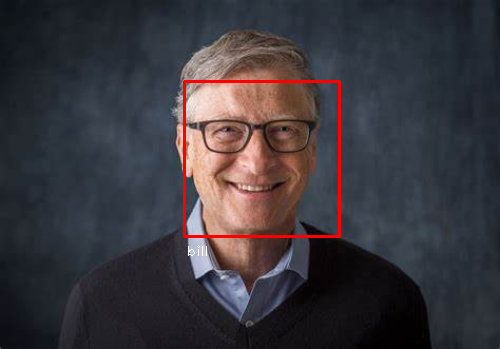

Processing 3.jpg


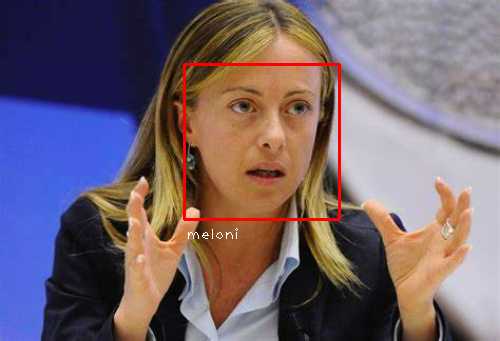

Processing 5.jpg


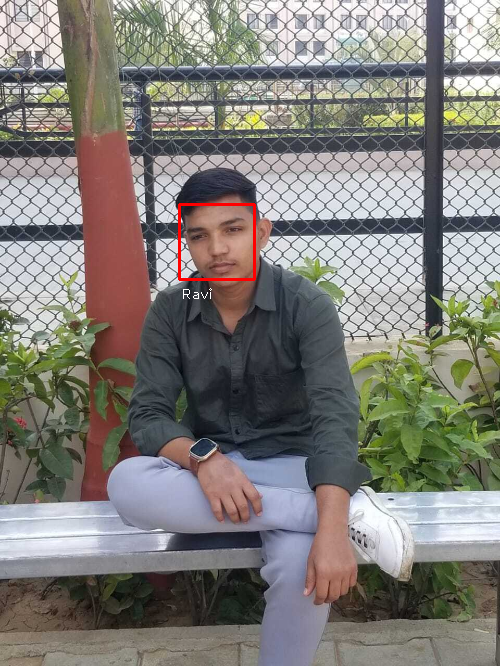

Processing 2.jpg


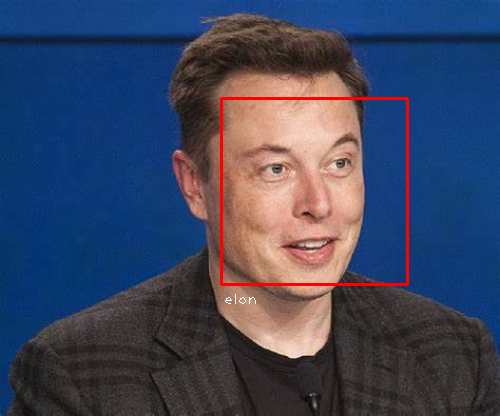

Processing .ipynb_checkpoints
Error: Unable to read image at path Unknown/.ipynb_checkpoints


In [22]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

# Function to read and resize an image
def read_img(path):
    img = cv2.imread(path)
    if img is None:
        print("Error: Unable to read image at path", path)
        return None
    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))

# Lists to store known encodings and corresponding names
known_encodings = []
known_names = []

# Directory where known images are stored
known_dir = 'Known'

# Loop through files in the known directory
for file in os.listdir(known_dir):
    # Skip directories
    if os.path.isdir(os.path.join(known_dir, file)):
        continue
    # Read the image
    img = read_img(os.path.join(known_dir, file))
    if img is None:
        continue
    # Encode the face in the image
    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])

# Directory where unknown images are stored
unknown_dir = 'Unknown'

# Create unknown directory if it doesn't exist
if not os.path.exists(unknown_dir):
    os.makedirs(unknown_dir)

# Loop through files in the unknown directory
for file in os.listdir(unknown_dir):
    print("Processing", file)
    # Read the image
    img = read_img(os.path.join(unknown_dir, file))
    if img is None:
        continue
    # Encode the face in the image
    img_enc = face_recognition.face_encodings(img)[0]

    # Compare the unknown face encoding with known encodings
    results = face_recognition.compare_faces(known_encodings, img_enc)

    # Iterate through results
    for i in range(len(results)):
        if results[i]:
            name = known_names[i]
            # Get the location of the face in the image
            (top, right, bottom, left) = face_recognition.face_locations(img)[0]
            # Draw a rectangle around the face
            cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
            # Put text indicating the name of the person above the rectangle
            cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
            # Display the image
            cv2_imshow(img)
